<a href="https://colab.research.google.com/github/yusufdimari/deep_learning/blob/main/S4310800_CSI_7_MAL_Tutorial_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_lfw_people

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn.decomposition import PCA



from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize= 0.4)


n_samples, h, w = lfw_people.images.shape
lfw_people.images.shape

(1288, 50, 37)

In [4]:
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.77      0.65        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.61      0.70      0.66        27
    George W Bush       0.94      0.89      0.92       146
Gerhard Schroeder       0.73      0.88      0.80        25
      Hugo Chavez       0.89      0.53      0.67        15
       Tony Blair       0.88      0.78      0.82        36

         accuracy                           0.84       322
        macro avg       0.77      0.77      0.76       322
     weighted avg       0.85      0.84      0.84       322

[[ 10   0   3   0   0   0   0]
 [  1  52   3   2   0   1   1]
 [  5   0  19   1   1   0   1]
 [  1   6   5 130   3   0   1]
 [  0   1   0   1  22   0   1]
 [  0   3   0   2   2   8   0]
 [  1   2   1   2   2   0  28]]
Donald Rumsfeld


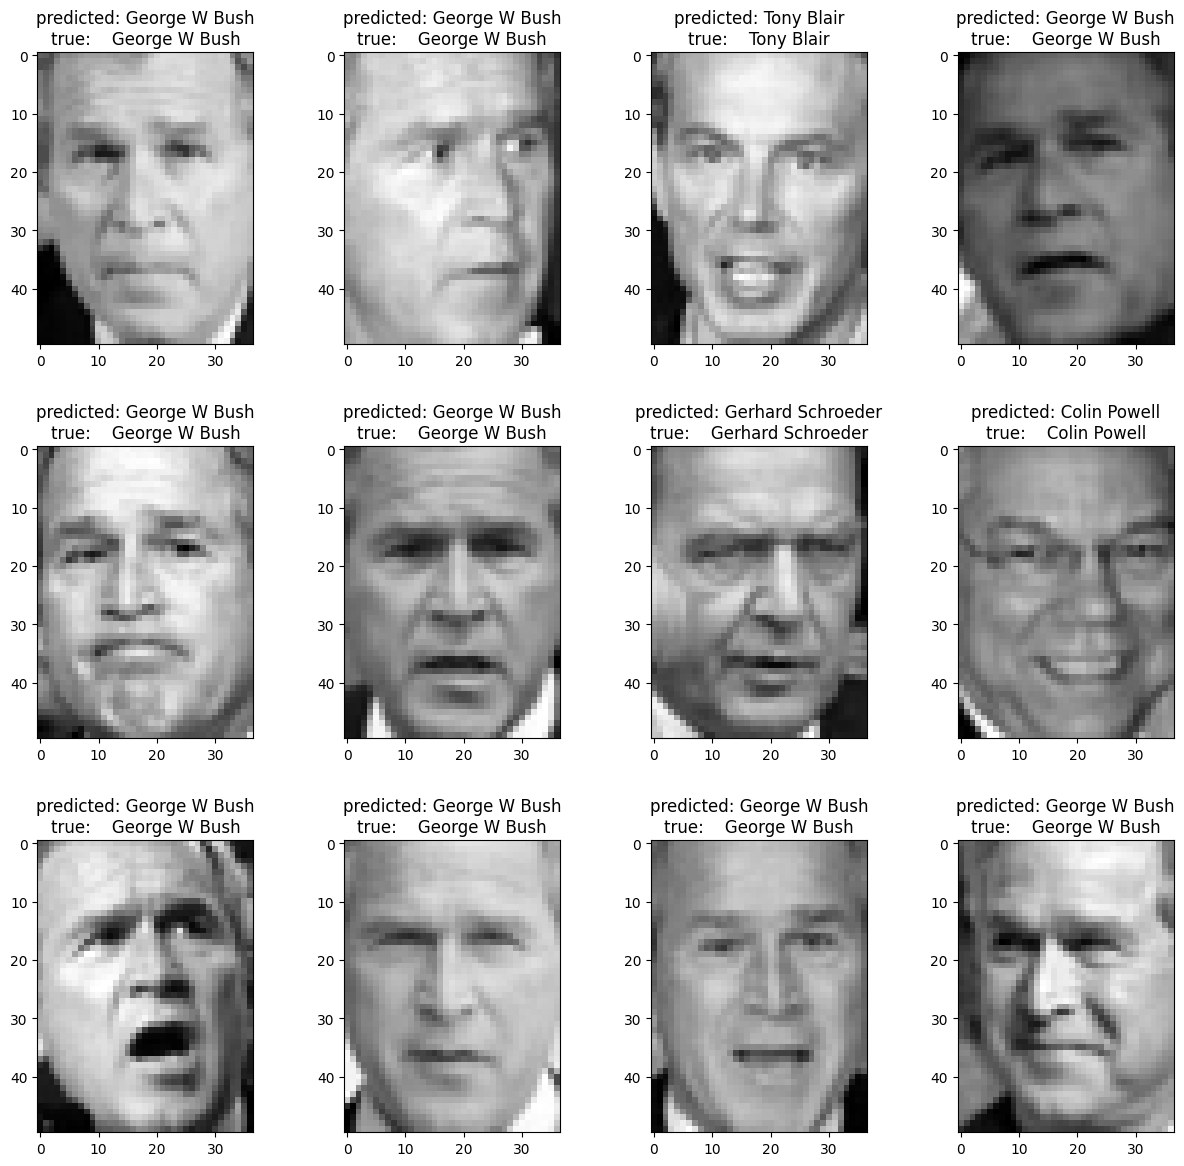

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

c=1000
clf= SVC(kernel= 'linear', class_weight='balanced', C=c)
clf = clf. fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

pred_name = target_names[y_pred[30]]

print (pred_name)
plt. figure (figsize=(12, 12))
plt. subplots_adjust (bottom=0, left=.01, right=.99, top=.90, hspace=.35)

for i in range(12):
    plt.subplot (3, 4, i + 1)
    plt.imshow(X_test[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title('predicted: %s\ntrue:    %s' % (target_names[y_pred[i]], target_names[y_test[i]]))

In [6]:
Cgrid=(np.logspace (1, 3, num=6))
param_grid = { 'C': Cgrid, }
clf = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid)
clf = clf. fit(X_train, y_train)
print("Best estimator found by grid search:")
print (clf.best_estimator_)
Y_pred = clf. predict (X_test)
print (classification_report (y_test, Y_pred, target_names=target_names ))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Best estimator found by grid search:
SVC(C=10.0, class_weight='balanced', kernel='linear')
                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.77      0.65        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.61      0.70      0.66        27
    George W Bush       0.94      0.89      0.92       146
Gerhard Schroeder       0.73      0.88      0.80        25
      Hugo Chavez       0.89      0.53      0.67        15
       Tony Blair       0.88      0.78      0.82        36

         accuracy                           0.84       322
        macro avg       0.77      0.77      0.76       322
     weighted avg       0.85      0.84      0.84       322

[[ 10   0   3   0   0   0   0]
 [  1  52   3   2   0   1   1]
 [  5   0  19   1   1   0   1]
 [  1   6   5 130   3   0   1]
 [  0   1   0   1  22   0   1]
 [  0   3   0   2   2   8   0]
 [  1   2   1   2   2   0  28]]


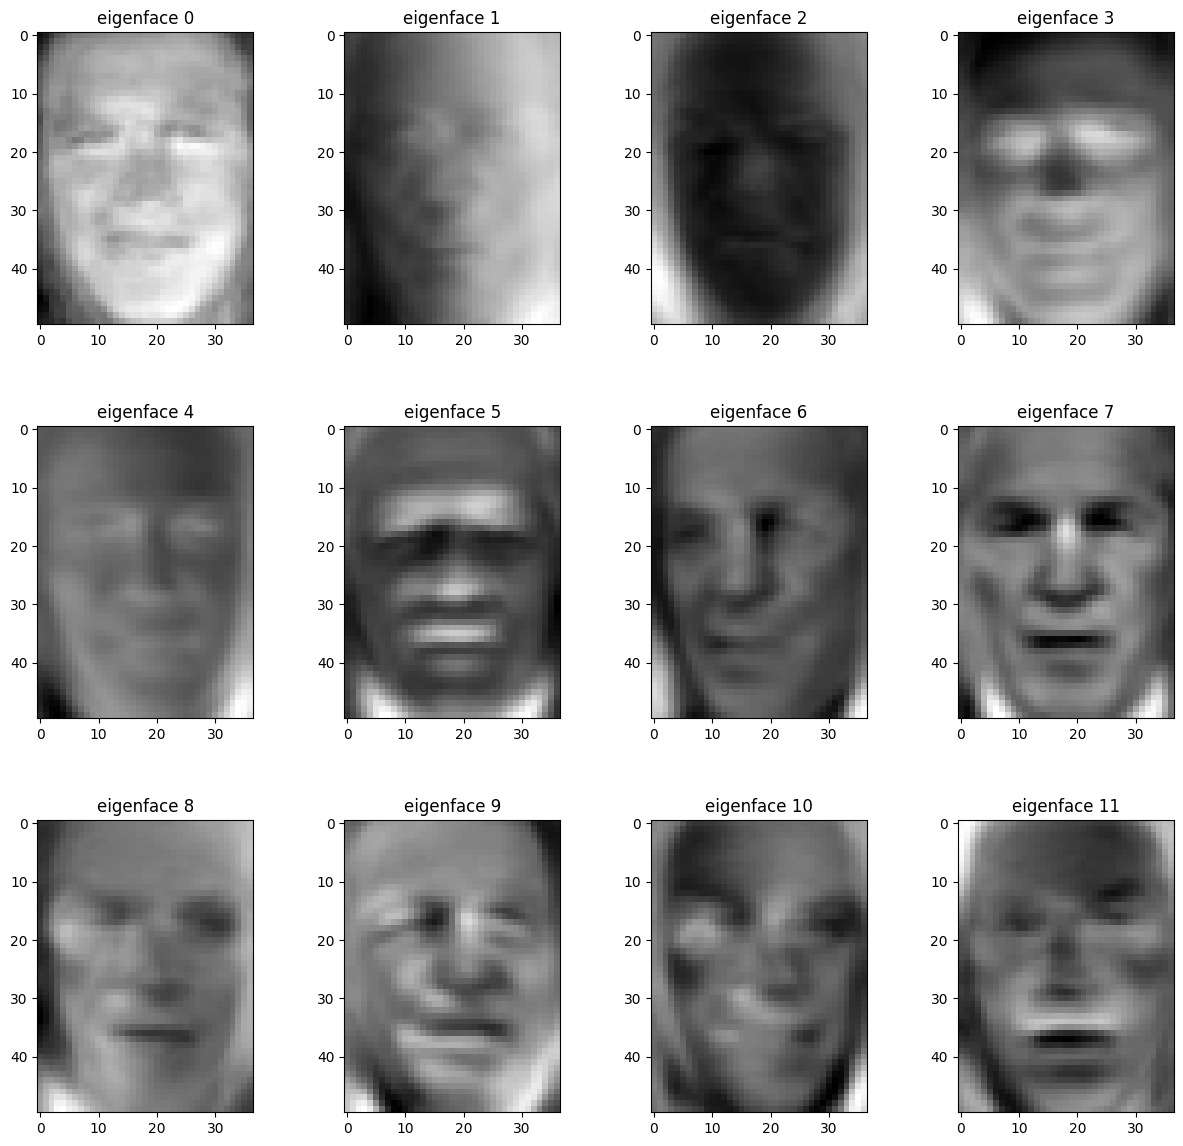

In [7]:
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


eigenfaces = pca.components_.reshape((n_components, h, w))
plt.figure(figsize=(12, 12))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range (12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(eigenfaces[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title("eigenface %d" % i)

##Example 1: Use a Linear SVM to classify the data transformed with PCA

In [8]:
# Use PCA-transformed data to train a linear SVM classifier
clf_pca = SVC(kernel='linear', class_weight='balanced', C=c)
clf_pca.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_pca = clf_pca.predict(X_test_pca)

# Classification report and confusion matrix
print(classification_report(y_test, y_pred_pca, target_names=target_names))
print(confusion_matrix(y_test, y_pred_pca, labels=range(n_classes)))

# Show a sample prediction
pred_name_pca = target_names[y_pred_pca[30]]
print(pred_name_pca)


                   precision    recall  f1-score   support

     Ariel Sharon       0.44      0.62      0.52        13
     Colin Powell       0.65      0.77      0.70        60
  Donald Rumsfeld       0.66      0.70      0.68        27
    George W Bush       0.87      0.82      0.84       146
Gerhard Schroeder       0.80      0.80      0.80        25
      Hugo Chavez       0.75      0.60      0.67        15
       Tony Blair       0.83      0.69      0.76        36

         accuracy                           0.76       322
        macro avg       0.71      0.71      0.71       322
     weighted avg       0.78      0.76      0.77       322

[[  8   1   2   2   0   0   0]
 [  4  46   2   6   0   1   1]
 [  4   1  19   2   0   0   1]
 [  1  14   4 119   4   2   2]
 [  0   1   0   4  20   0   0]
 [  0   3   0   1   1   9   1]
 [  1   5   2   3   0   0  25]]
Donald Rumsfeld


Use a grid search over C to optimize the performance.

In [9]:
# Grid search for optimal C value
param_grid = {'C': Cgrid}
clf_grid_search = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid)
clf_grid_search.fit(X_train_pca, y_train)

# Best estimator from grid search
print("Best estimator found by grid search:")
print(clf_grid_search.best_estimator_)

# Predictions and evaluation on test set
Y_pred_grid = clf_grid_search.predict(X_test_pca)
print(classification_report(y_test, Y_pred_grid, target_names=target_names))
print(confusion_matrix(y_test, Y_pred_grid, labels=range(n_classes)))


Best estimator found by grid search:
SVC(C=10.0, class_weight='balanced', kernel='linear')
                   precision    recall  f1-score   support

     Ariel Sharon       0.44      0.62      0.52        13
     Colin Powell       0.65      0.77      0.70        60
  Donald Rumsfeld       0.66      0.70      0.68        27
    George W Bush       0.87      0.82      0.84       146
Gerhard Schroeder       0.80      0.80      0.80        25
      Hugo Chavez       0.75      0.60      0.67        15
       Tony Blair       0.83      0.69      0.76        36

         accuracy                           0.76       322
        macro avg       0.71      0.71      0.71       322
     weighted avg       0.78      0.76      0.77       322

[[  8   1   2   2   0   0   0]
 [  4  46   2   6   0   1   1]
 [  4   1  19   2   0   0   1]
 [  1  14   4 119   4   2   2]
 [  0   1   0   4  20   0   0]
 [  0   3   0   1   1   9   1]
 [  1   5   2   3   0   0  25]]


##Example 2: Radial Basis function SVM to classify the original data

In [10]:
# Use an RBF kernel SVM to classify the original data
clf_rbf = SVC(kernel='rbf', class_weight='balanced')
clf_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred_rbf = clf_rbf.predict(X_test)

# Classification report and confusion matrix
print("RBF SVM on original data:")
print(classification_report(y_test, y_pred_rbf, target_names=target_names))
print(confusion_matrix(y_test, y_pred_rbf, labels=range(n_classes)))

# Grid search for optimal C and gamma values
param_grid_rbf = {'C': Cgrid, 'gamma': ['scale', 'auto']}
clf_rbf_grid = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid_rbf)
clf_rbf_grid.fit(X_train, y_train)

# Best estimator from grid search
print("Best RBF estimator found by grid search (original data):")
print(clf_rbf_grid.best_estimator_)

# Predictions and evaluation on test set
Y_pred_rbf_grid = clf_rbf_grid.predict(X_test)
print(classification_report(y_test, Y_pred_rbf_grid, target_names=target_names))
print(confusion_matrix(y_test, Y_pred_rbf_grid, labels=range(n_classes)))

RBF SVM on original data:
                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.77      0.69        13
     Colin Powell       0.78      0.83      0.81        60
  Donald Rumsfeld       0.62      0.56      0.59        27
    George W Bush       0.87      0.85      0.86       146
Gerhard Schroeder       0.72      0.72      0.72        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.67      0.67      0.67        36

         accuracy                           0.78       322
        macro avg       0.71      0.72      0.71       322
     weighted avg       0.78      0.78      0.78       322

[[ 10   0   3   0   0   0   0]
 [  1  50   0   6   0   1   2]
 [  2   4  15   5   1   0   0]
 [  2   6   4 124   2   2   6]
 [  0   0   0   1  18   2   4]
 [  1   2   0   2   0  10   0]
 [  0   2   2   4   4   0  24]]
Best RBF estimator found by grid search (original data):
SVC(C=63.09573444801933, class_weight='balanced

Use a grid search over C and gamma to optimize the
performance.

In [11]:
# Use an RBF kernel SVM to classify the PCA-transformed data
clf_rbf_pca = SVC(kernel='rbf', class_weight='balanced')
clf_rbf_pca.fit(X_train_pca, y_train)

# Predict on the PCA test set
y_pred_rbf_pca = clf_rbf_pca.predict(X_test_pca)

# Classification report and confusion matrix
print("RBF SVM on PCA-transformed data:")
print(classification_report(y_test, y_pred_rbf_pca, target_names=target_names))
print(confusion_matrix(y_test, y_pred_rbf_pca, labels=range(n_classes)))

# Grid search for optimal C and gamma values
clf_rbf_pca_grid = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid_rbf)
clf_rbf_pca_grid.fit(X_train_pca, y_train)

# Best estimator from grid search
print("Best RBF estimator found by grid search (PCA-transformed data):")
print(clf_rbf_pca_grid.best_estimator_)

# Predictions and evaluation on PCA test set
Y_pred_rbf_pca_grid = clf_rbf_pca_grid.predict(X_test_pca)
print(classification_report(y_test, Y_pred_rbf_pca_grid, target_names=target_names))
print(confusion_matrix(y_test, Y_pred_rbf_pca_grid, labels=range(n_classes)))


RBF SVM on PCA-transformed data:
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.62      0.76        13
     Colin Powell       0.68      0.95      0.79        60
  Donald Rumsfeld       0.86      0.67      0.75        27
    George W Bush       0.91      0.92      0.92       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.67      0.80        15
       Tony Blair       0.97      0.78      0.86        36

         accuracy                           0.86       322
        macro avg       0.91      0.77      0.82       322
     weighted avg       0.88      0.86      0.86       322

[[  8   3   0   2   0   0   0]
 [  0  57   1   2   0   0   0]
 [  0   4  18   5   0   0   0]
 [  0  11   0 135   0   0   0]
 [  0   2   0   2  20   0   1]
 [  0   4   0   0   1  10   0]
 [  0   3   2   3   0   0  28]]
Best RBF estimator found by grid search (PCA-transformed data):
SVC(C=10.0, class_weight='balance

##Example 3

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape the original data for CNN (n_samples, height, width, channels)
X_train_cnn = X_train.reshape((-1, h, w, 1))
X_test_cnn = X_test.reshape((-1, h, w, 1))

# Build the CNN model
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(h, w, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test)
print(f"Test accuracy on original data: {test_acc}")

# Predictions
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)

# Classification report and confusion matrix
print(classification_report(y_test, y_pred_cnn_labels, target_names=target_names))
print(confusion_matrix(y_test, y_pred_cnn_labels, labels=range(n_classes)))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.3382 - loss: 1.7949 - val_accuracy: 0.4534 - val_loss: 1.6024
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.4036 - loss: 1.7169 - val_accuracy: 0.4534 - val_loss: 1.6394
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - accuracy: 0.3759 - loss: 1.7201 - val_accuracy: 0.4534 - val_loss: 1.5877
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 322ms/step - accuracy: 0.3926 - loss: 1.7015 - val_accuracy: 0.4534 - val_loss: 1.6196
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.4036 - loss: 1.6760 - val_accuracy: 0.4534 - val_loss: 1.6031
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.3898 - loss: 1.6620 - val_accuracy: 0.4627 - val_loss: 1.5393
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.4078 - loss: 1.6249 - val_accuracy: 0.5062 - val_loss: 1.4461
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.4801 - loss: 1.4738 - val_accuracy: 0.5280 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Reshape the PCA-transformed data for CNN (n_samples, n_components, 1)
X_train_cnn_pca = X_train_pca.reshape((-1, n_components, 1))
X_test_cnn_pca = X_test_pca.reshape((-1, n_components, 1))

# Build the CNN model for PCA-transformed data
model_cnn_pca = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(n_components, 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Compile the model
model_cnn_pca.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
history_cnn_pca = model_cnn_pca.fit(X_train_cnn_pca, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn_pca, y_test))

# Evaluate the model on the test set
test_loss_pca, test_acc_pca = model_cnn_pca.evaluate(X_test_cnn_pca, y_test)
print(f"Test accuracy on PCA-transformed data: {test_acc_pca}")

# Predictions
y_pred_cnn_pca = model_cnn_pca.predict(X_test_cnn_pca)
y_pred_cnn_pca_labels = np.argmax(y_pred_cnn_pca, axis=1)

# Classification report and confusion matrix
print(classification_report(y_test, y_pred_cnn_pca_labels, target_names=target_names))
print(confusion_matrix(y_test, y_pred_cnn_pca_labels, labels=range(n_classes)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.3885 - loss: 1.7948 - val_accuracy: 0.4534 - val_loss: 1.6246
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.3891 - loss: 1.7139 - val_accuracy: 0.4534 - val_loss: 1.6024
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4062 - loss: 1.6485 - val_accuracy: 0.4814 - val_loss: 1.5450
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4138 - loss: 1.5229 - val_accuracy: 0.5124 - val_loss: 1.4396
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5390 - loss: 1.2903 - val_accuracy: 0.5559 - val_loss: 1.2745
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6708 - loss: 1.0673 - val_accuracy: 0.4689 - val_loss: 1.3569
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6525 - loss: 0.9502 - val_accuracy: 0.6335 - val_loss: 1.1080
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7694 - loss: 0.6925 - val_accuracy: 0.6335 - v